# Section 0.0 - Preface, Disclaimer, Package Imports, and Data Loading, Display, & Description

Below we will introduce the problem and why we used `NeuralProphet`, all installations of required packages, loading of the data, and basic visualization of the dataset

## Section 0.1 - Installation

Below we install all necessary packages

In [82]:
%pip install git+https://github.com/ourownstory/neural_prophet.git

  Cloning https://github.com/ourownstory/neural_prophet.git to c:\users\sunny\appdata\local\temp\pip-req-build-u7qv_g3o
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 0c8459528d4343c5a8b54d4120b22f089419e423
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for neuralprophet: filename=neuralprophet-0.3.3-py3-none-any.whl size=82316 sha256=f1dffb1c30238ba1fdc48edb52466472e848a33d3f0022119a2a8afe80cad3da
  Stored in directory: C:\Users\sunny\AppData\Local\Temp\pip-ephem-wheel-cache-uzcwkm2i\wheels\32\ce\37\d289cb9c67e62f7912fc3a25e624277ea47902c32e24371a78
Successfully built neuralprophet
  Attempting uninstall: neuralprophet
    Found existing installation: neuralprophet 0

  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git 'C:\Users\sunny\AppData\Local\Temp\pip-req-build-u7qv_g3o'
  Running command git submodule update --init --recursive -q


In [266]:
%pip install neuralprophet
%pip install matplotlib
%pip install seaborn
%pip install pickle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


## Section 0.2 - Package Imports

Below we import all required packages

In [267]:
from neuralprophet import NeuralProphet, set_random_seed, set_log_level; set_random_seed(314159); set_log_level("ERROR", "INFO")
from neuralprophet.df_utils import make_future_df, fill_linear_then_rolling_avg, add_missing_dates_nan

import pandas as pd
import numpy as np

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True); sns.set_style("whitegrid")

import time

import pickle

## Section 0.3 Data Loading, Display, & Description

Using the below predictors/descriptions we output the first `20` entries (rows) as well as basic descriptive statistics of the dataset

The data is provided to you in NYU Brightspace. It contains 17414 records in total, ranging from 2015-01-04 to 2017-01-03. In each record, we have the following columns:

* "timestamp" - timestamp field for grouping the data
* "cnt" - the count of new bike shares
* "t1" - real temperature in Celsius
* "t2" - "feels like" temperature in Celsius
* "hum" - humidity in percentage
* "windspeed" - wind speed in km/h
* "weathercode" - category of the weather (1-clear; 2-scattered clouds; 3-broken clouds; 4-
* "cloudy" - 7-light rain; 10-rain with thunderstorm; 26-snowfall; 94-freezing fog)
* "isholiday" – binary variable - 1 holiday / 0 non holiday
* "isweekend" - binary variable - 1 if the day is weekend / 0 non weekend
* "season" – category of the season (0-spring ; 1-summer; 2-fall; 3-winter)

In [75]:
df = pd.read_csv('bike_sharing_dataset.csv')

In [4]:
df.head(30)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [5]:
df.describe(include='all')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
unique,17414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,NaN,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,NaN,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,NaN,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Below we create a pairplot of the dataframe of all columns for visualization, and color the data by the categorical variable `'season'`

WARNING - (py.warnings._showwarnmsg) - c:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)

WARNING - (py.warnings._showwarnmsg) - c:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)

WARNING - (py.warnings._showwarnmsg) - c:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)

WARNING - (py.warnings._showwarnmsg) - c:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\seabor

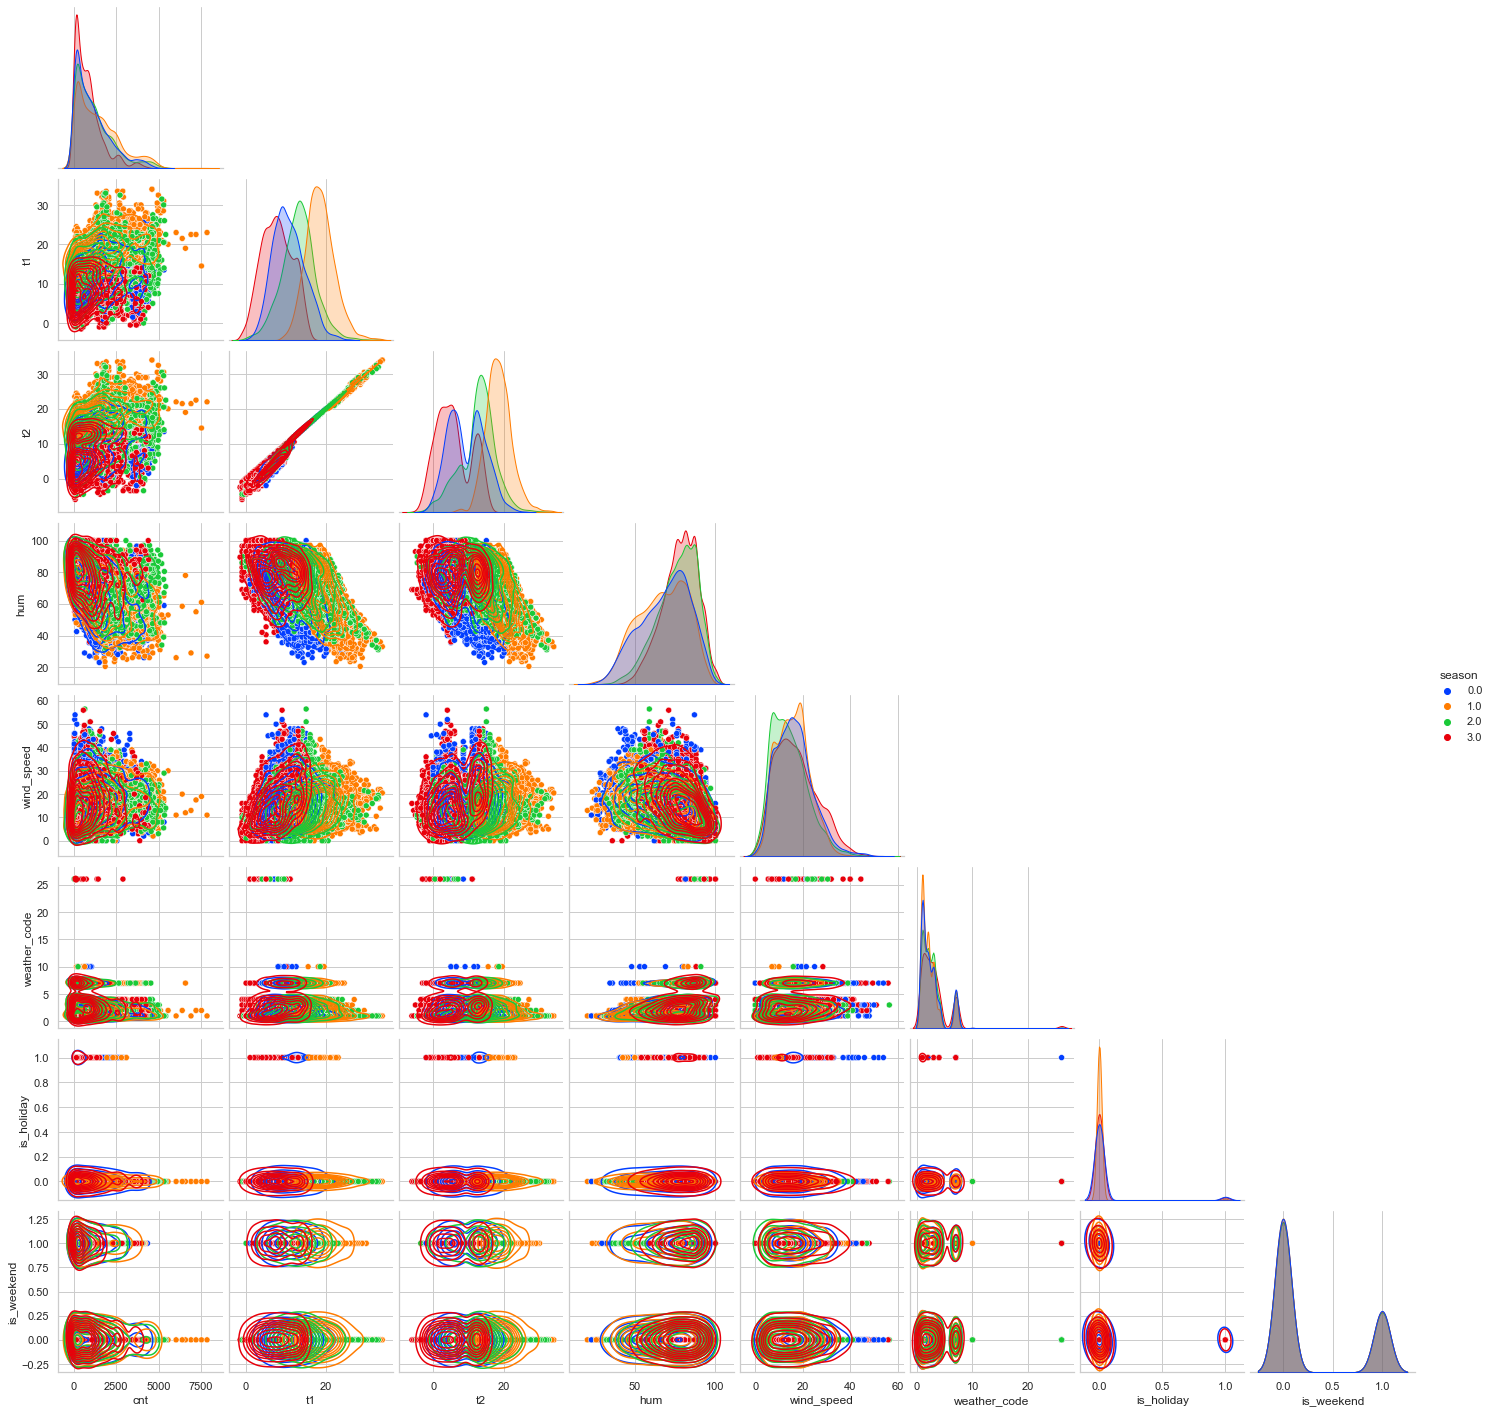

In [6]:
pairplt = sns.pairplot(data=df, hue='season', corner=True, palette='bright')
pairplt.map_lower(sns.kdeplot, levels=10, color=".2")

# Section 2.0 -  `NeuralProphet` DataFrame Reformatting, Imputation, Normalization, and Splitting

Below we remodel the imported `bike_sharing_dataset.csv` dataset for compatible use with `NeuralProphet`

## Section 2.1 - DataFrame Reformatting

Below we create the new FataFrame `df_NP` in the format required by `NeuralProphet`, with:
- A column `'ds'` for the time occurrence of each entry
    - This will act as our **SOLE** predictor
- A column `'y'` for the label associated with each predictor
    - This will act as our **SOLE** label

We then call `neuralprophet.df_utils.add_missing_dates` to obtain a dataframe with missing values in the `y` column, but all missing dates (with hourly, `'H'` timestamps) added in

In [109]:
df_NP = df.rename(columns={'timestamp': 'ds', 'cnt': 'y'})[['ds', 'y']]
df_NP = add_missing_dates_nan(df_NP, 'H')[0]

In [110]:
df_NP

,ds,y
0,2015-01-04 00:00:00,182.0
1,2015-01-04 01:00:00,138.0
2,2015-01-04 02:00:00,134.0
3,2015-01-04 03:00:00,72.0
4,2015-01-04 04:00:00,47.0
...,...,...
17539,2017-01-03 19:00:00,1042.0
17540,2017-01-03 20:00:00,541.0
17541,2017-01-03 21:00:00,337.0
17542,2017-01-03 22:00:00,224.0


The below line checks for the validity of this addition, ensuring that there are indeed missing, `NaN` values in this new `df_NP`

In [111]:
df_NP.isnull().values.any()

True

## Section 2.2 - Imputation

Below we call the `neuralprophet.df_utils.fill_linear_then_rolling_avg` function to impute missing values

This is done by linearly imputing values (up to a limit of 10 missing values in a row as shown by `limit_linear=10`), then filling with a rolling trendline when the number of missing values is greater than 10 as shown by `rolling=50`

Note, the rolling window is calculated by `window= rolling + 2*limit_linear`, so we will be considering a window of 17 values to compute the rolling average over

In [112]:
df_NP = df_NP.assign(y=fill_linear_then_rolling_avg(df_NP['y'], limit_linear=10, rolling=50)[0])

Below we check for the validity of or dataframe, with no `NaN` values:

In [113]:
df_NP.isnull().values.any()

False

## Section 2.3 - Normalization

Below we normalize the target dataframe using `sklearn.preprocessing.MinMaxScaler` and essentially applies the function:

$$
\vec{x}_{\mathbf{N}} = \frac{\vec{x}-\vec{x}_{\mathbf{Max}}}{\vec{x}_{\mathbf{Max}} - \vec{x}_{\mathbf{Min}}}
$$

where $\vec{x}_{\mathbf{N}}$ is the normalized vector (series), $ \vec{x} \in \mathbb{R}^{m \times 1} $ is the target vector, $ \vec{x}_{\mathbf{Max}} \in \mathbb{R}^{m \times 1} $ is the vector of all entries being the maximum value of $ \vec{x} $, and $ \vec{x}_{\mathbf{Max}} \in \mathbb{R}^{m \times 1} $ is the vector of all entries being the minimum value of $ \vec{x} $

In [115]:
df_NP[['y']] = MinMaxScaler().fit_transform(df_NP[['y']])

## Section 2.4 - Train Test Split

Below we manually split the dataset according to the requirements set out in the Spec Sheet:
- `train` goes from 2015-01-04 to 2016-09-30
- `test` goes from  2016-10-01 to 2017-01-03

We do this manually because of the frequency (hourly) nature of the dataset making it difficult to handle via packages like `sklearn.model_selection.train_test_split`

In [116]:
train = df_NP.loc[:15112,:]
test = df_NP.loc[15112:,:]

# Section 3.0 - Auxiliary Methods

Below we define some auxiliary methods to plot visualizations of model performance

## Section 3.1 - `plot_forecast`

Below we create the `plot_forecast` function that takes in a built `NeuralProphet` model and a test dataset for comparison of performance in predictive ability. Then a plot is generated of this performance

In [118]:
def plot_forecast(model, data, periods=0, historic_pred=True, highlight_steps_ahead=None, xlabel='Date', ylabel=None, title=None):
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    fig, ax = plt.subplots(figsize=(14,10))

    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast, ax=ax, xlabel=xlabel, ylabel=ylabel)
        ax.set_title(title, fontsize=20, fontweight="bold")

    else:    
        model.plot(forecast, ax=ax, xlabel=xlabel, ylabel=ylabel)
        ax.set_title(title, fontsize=20, fontweight="bold")


## Section 3.2 - `plot_validation`

Below we create the `plot_validation` function that takes in a `metrics` dataframe of validation metrics and the desired `list` of metrics to plot (defaults to all three `'SmoothL1Loss'`, `'MAE'`, `'RMSE'`) and outputs plots for each

The function programatically calculates for the width of each plot to ensure the same size for each subplot

In [281]:
def plot_validation(metrics_df, metrics = ['SmoothL1Loss', 'MAE', 'RMSE']):
    met_len = len(metrics)

    fig, axs = plt.subplots(ncols=len(metrics), nrows=1, sharex=True, sharey=True, figsize=(8*met_len, 8))
    fig.suptitle('Validation Metrics', fontsize=20, y=0.95)

    if met_len == 1:
        metric = metrics[0]
        axs.plot(metrics_df[metric], 'ob', linewidth=6, label='Training Loss', markersize='3')
        axs.plot(metrics_df[f'{metric}_val'], 'r', linewidth=2, label='Validation Loss')

        axs.set_xlabel('Training Loss')
        axs.set_ylabel('Validation Loss')
        axs.set_title(metric)
        axs.legend()
    else:
        for metric, ax in zip(metrics, axs.ravel()):
            ax.plot(metrics_df[metric], 'ob', linewidth=6, label='Training Loss', markersize='3')
            ax.plot(metrics_df[f'{metric}_val'], 'r', linewidth=2, label='Validation Loss')

            ax.set_xlabel('Training Loss')
            ax.set_ylabel('Validation Loss')
            ax.set_title(metric)
            ax.legend()

# Section 3.0 - Model Fitting, Benchmarking, Hyperparameter Tuning, & Interpretation

Below we create three `NeuralProphet` models to develop the best performance against the dataset

## Section 3.1 Baseline Model

Below we create `model`, a baseline model to output the results of a fitting of the standard `NeuralProphet` model

### Section 3.1.1 - Instantiation

Below we instantiate the baseline `NeuralProphet` in the form of a model, `model1` to act as our benchmark

In [120]:
model1 = NeuralProphet() ## Need to figure out n_lags

### Section 3.1.2 - Fitting

Below we fit `model1` to our dataset with the parameter `freq='H'` recognizing inputs as being hourly

In [121]:
metrics1 = model1.fit(train, freq='H', validation_df=test)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

### Section 3.1.3 - Plot Parameters

Below we show the parameter plots associated with the elements of our time-series model. More detail will be expounded upon in future models

**Note**: For each `plot_parameters` call in the future, there will be **two plot outputs**, and tey are the exact same as one another

This cannot be fixed as it is a bug with the coding in `NeuralProphet`

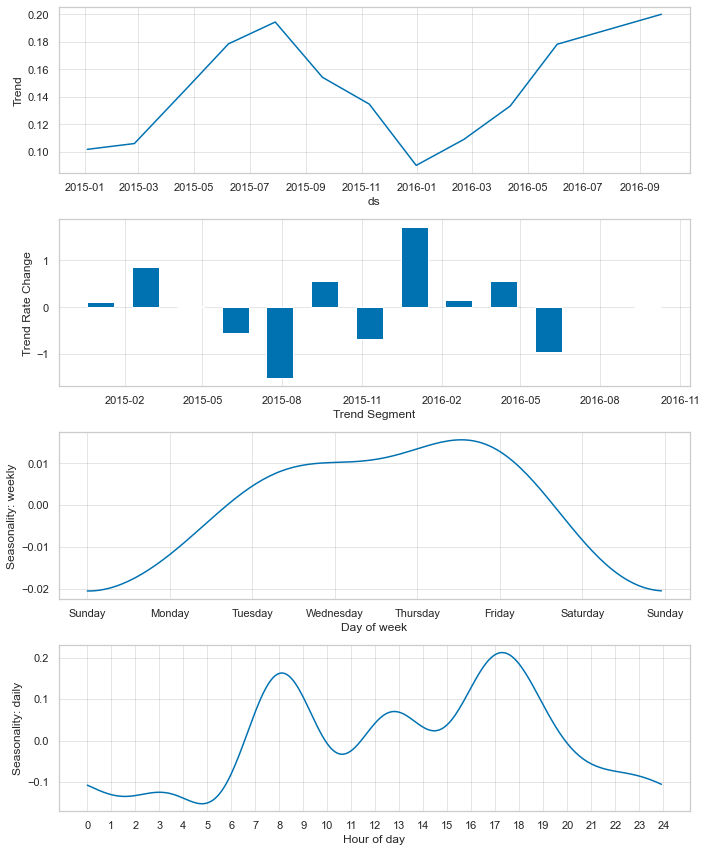

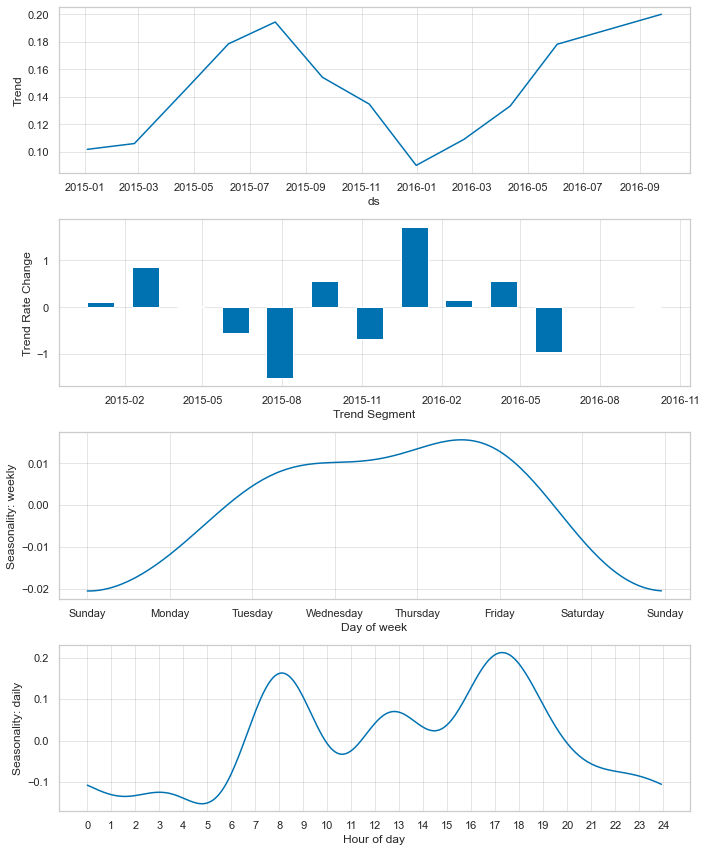

In [122]:
model1.plot_parameters()

### Section 3.1.4 - Forecast Plot

Below we plot the forecast for our baseline `model1`

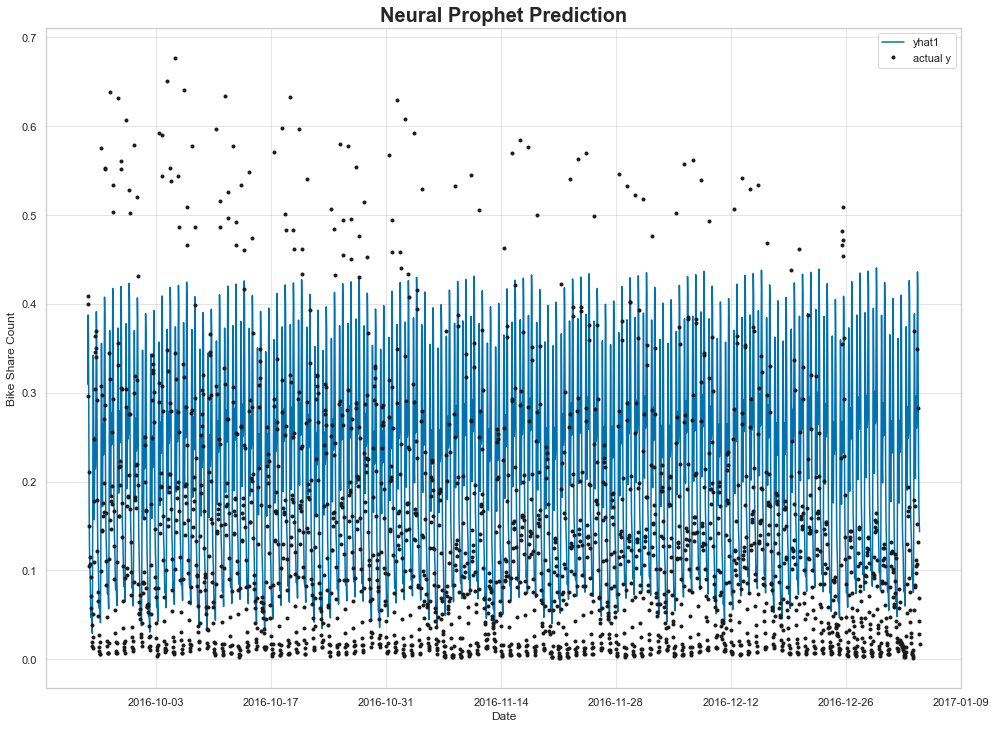

In [123]:
plot_forecast(model1, test, xlabel='Date', ylabel='Bike Share Count', title='Neural Prophet Prediction')

### Section 3.1.5 - Validation Metrics

Below we show plots of the validation metrics for our benchmark, baseline `model1`

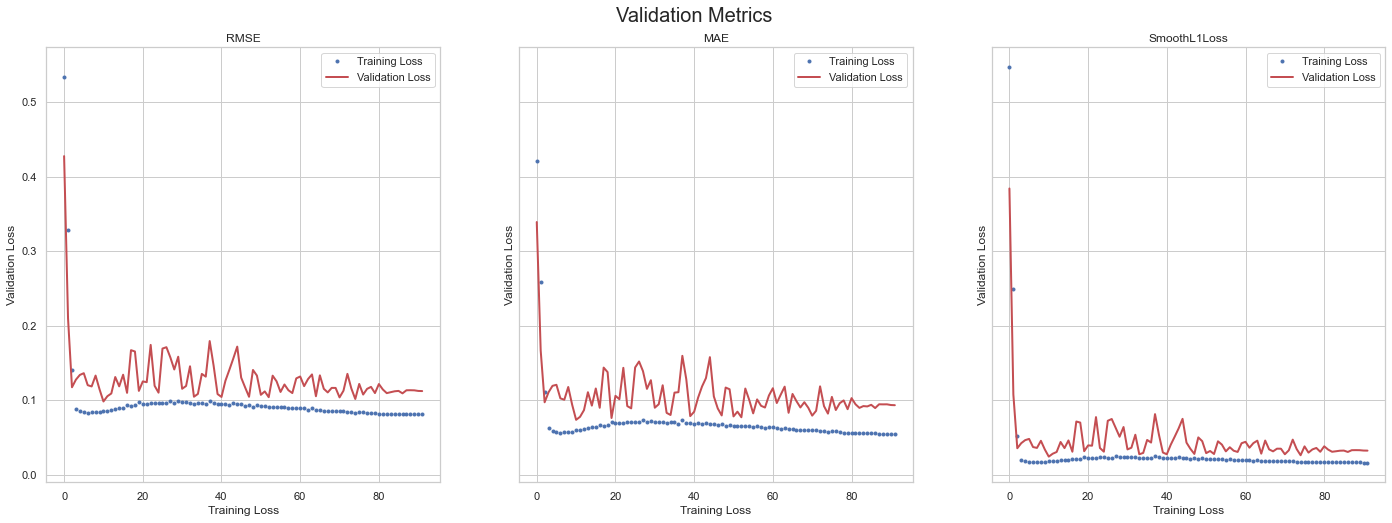

In [263]:
plot_validation(metrics1, metrics=['RMSE', 'MAE', 'SmoothL1Loss'])

### Section 3.1.6 - Metrics DataFrame

Below we show the `metrics` dataframe for `model1`

In [125]:
metrics1

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.546776,0.420338,0.533924,0.0,0.384073,0.339075,0.427468
1,0.249604,0.258966,0.327920,0.0,0.107790,0.166596,0.209749
2,0.052096,0.110632,0.140767,0.0,0.035669,0.097317,0.117466
3,0.019789,0.062342,0.088905,0.0,0.042465,0.110804,0.127653
4,0.018343,0.058438,0.085584,0.0,0.046532,0.119367,0.134007
...,...,...,...,...,...,...,...
87,0.016627,0.055403,0.081433,0.0,0.033060,0.094637,0.113425
88,0.016585,0.055424,0.081351,0.0,0.033137,0.094517,0.113502
89,0.016554,0.055240,0.081348,0.0,0.033056,0.094588,0.113364
90,0.016524,0.055306,0.081098,0.0,0.032575,0.093645,0.112541


## Section 3.2 - Specific Parametered Model

Below we create `model2` with specific, initial parameters to be evaluated on, and acts as the basis of futher hyperparameter tuning

### Section 3.2.1 - Instantiation

Below we instantiate a `NeuralProphet` model with custom-set parameters. We changed `n_lags=24*7` to try to account for weekly autocorrelation

We also turn on the AR-Net functionality (using a Neaural Network [NN] to drive the autocorrelation regression feature), with the backend NN having `num_hidden_layers=8` (the number of hidden layers), `d_hidden=64` (the width of a hidden layer), and `learning_rate=None` (automatically determining the learning rate). We did not tune for hidden layer depth or width

We first set `epochs=None` to atomatically determine the number of epochs to train for, which will be hyperparameter tuned later on

We also set `yearly_seasonality=True` to implement a seasonality trend over the year. Every other parameter was left default

In [184]:
# Current model
model2 = NeuralProphet(
                        growth='linear',  # Determine trend types: 'linear', 'discontinuous', 'off'
                        changepoints=None, # list of dates that may include change points (None -> automatic )
                        n_changepoints=52, # Number of weeks in a month, looks at a potential changepoint evey month
                        changepoints_range=1, # Set to 1 for use of changepoints throughout the time-series
                        trend_reg=0, # Changed to 0 for no flexibility in selection of changepoints
                        trend_reg_threshold=False, # Requires regularization for trend to be changed
                        yearly_seasonality=True, # Automatically fits yearly seasonality
                        weekly_seasonality='auto', # Automatically fits weekly seasonality
                        daily_seasonality='auto', # Automatically fits daily seasonality
                        seasonality_mode='additive', # Additional (adds) seasonality instead of multiplicative (multiplies) seasonality
                        seasonality_reg=0, # Due to the dataset being based on bike shares, visually will be very impacted by seasonality: set at maximum
                        n_forecasts=1, # Set at default 1 for forecasting one step ahead
                        n_lags=24*7, # To include 7 days worth of AR lag
                        num_hidden_layers=8, # 8 hidden layers for the network
                        d_hidden=64, # Dimension of hidden layers of AR-Net
                        learning_rate=None, # Automatically determines learning rate
                        epochs=None, # Automatically sets the learning rate (based on data size)
                        loss_func='Huber', # Sets Huber loss function for robustness to outliers ### Describe Huber in presentation/write-up
                        # normalize='auto',  # Type of normalization ('minmax', 'standardize', 'soft', 'auto', None) ## Why normalize again?
)

model2.add_country_holidays('USA') # Adds effects of US holidays

### Section 3.2.2 - Fitting

Below we fit `model2`, with `freq='H'` for hourly frequency

In [185]:
metrics2 = model2.fit(train, freq='H', validation_df=test)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

### Section 3.2.3 - Plotting Prameters

Below we plot the parameters for `model2`, noting performance of the AR regressor drops off after ~12, allowing for later hyperparameter tuning

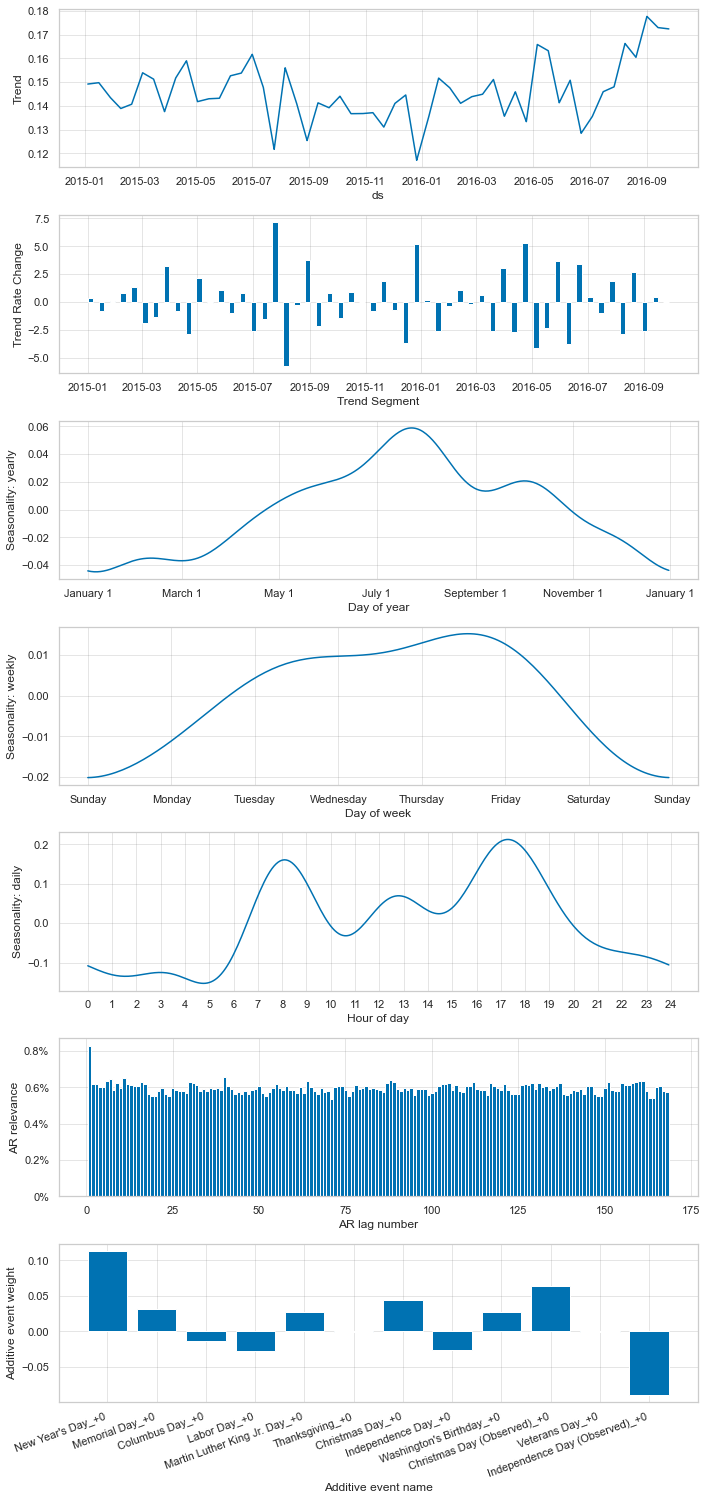

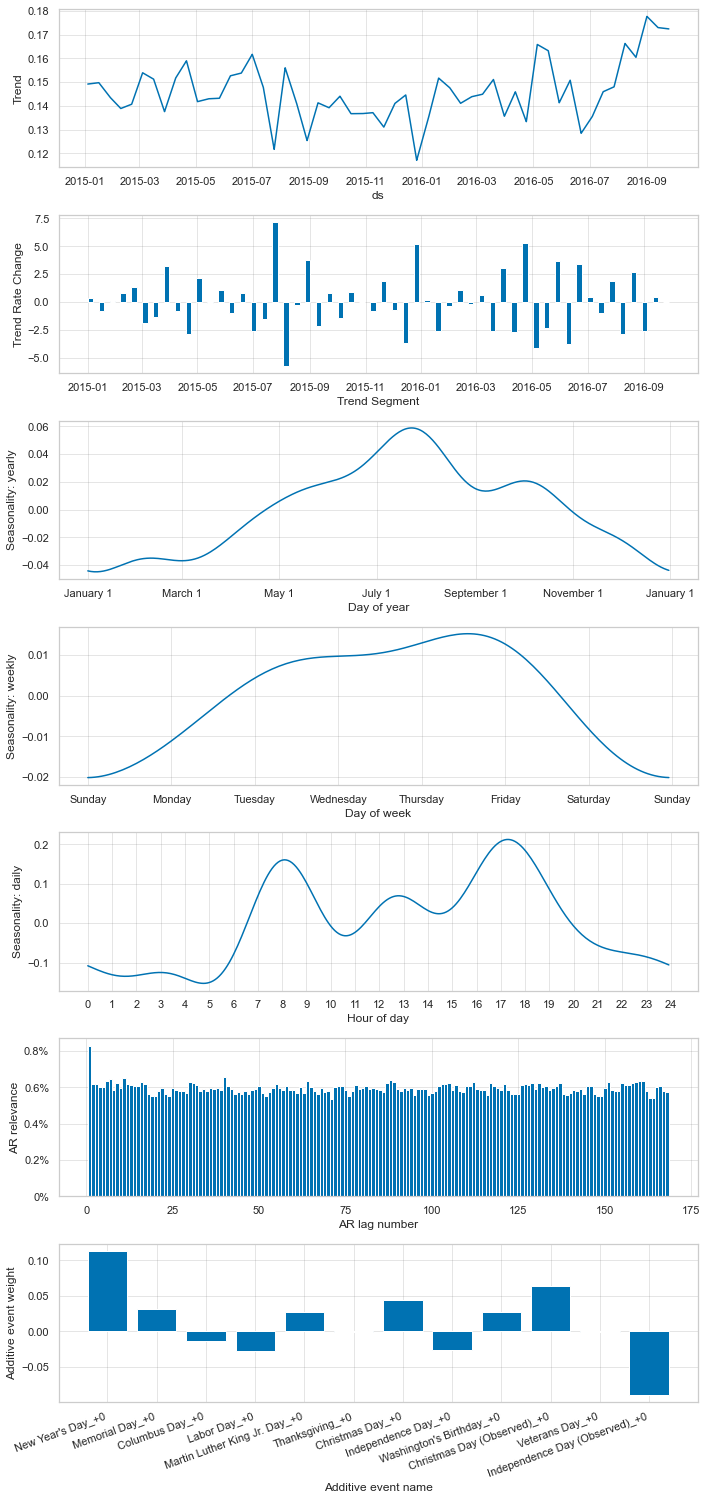

In [186]:
model2.plot_parameters()

### Section 3.2.4 - Forecast Plot

Below we plot the forcase of our `model2`

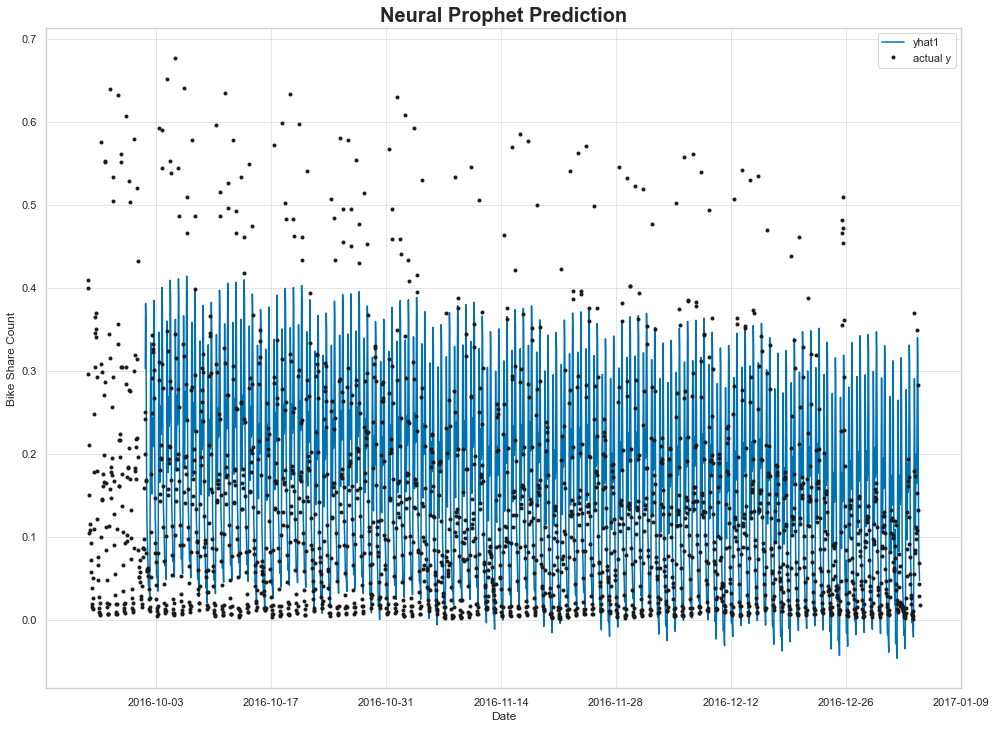

In [187]:
plot_forecast(model2, test, xlabel='Date', ylabel='Bike Share Count', title='Neural Prophet Prediction')

### Section 3.2.5 - Validation Metrics

Below we plot the validation metrics for our model. We note the optimal number of epochs (12) working best for our model

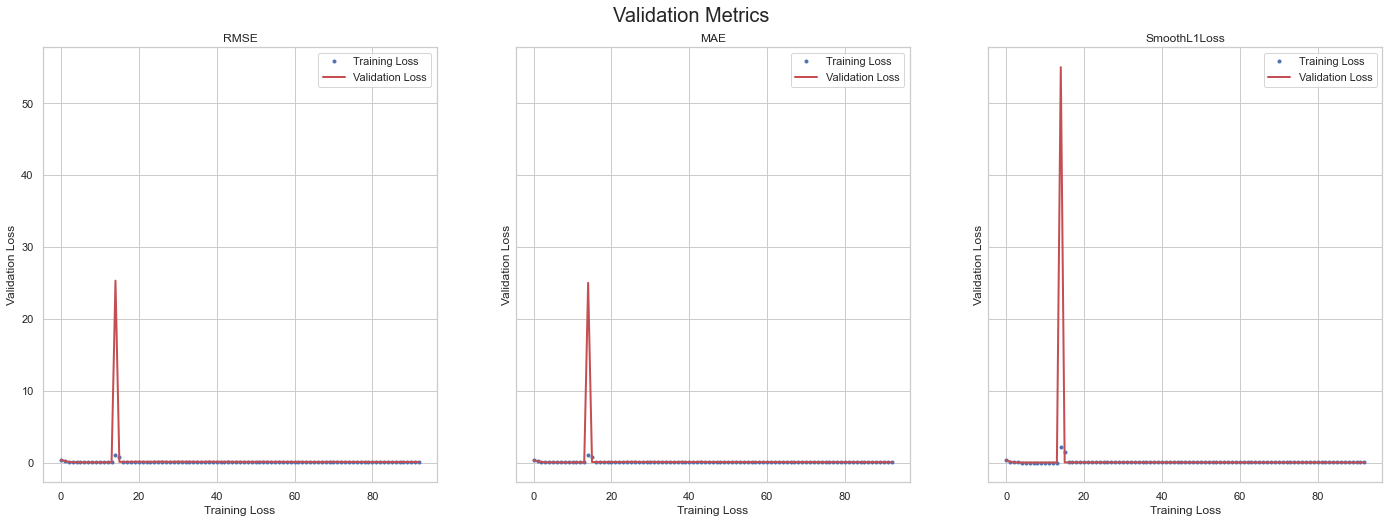

In [264]:
plot_validation(metrics2, metrics=['RMSE', 'MAE', 'SmoothL1Loss'])

### Section 3.2.6 - Metrics DataFrame

Below we show the `metrics` dataframe for `model2`. As with the plots in Section 2.2.5, we will use these values to determine the optimal numbero f training epochas for our next model, `model3`

In [189]:
metrics2

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.342093,0.316454,0.386446,0.0,0.337345,0.313870,0.377986
1,0.108074,0.167739,0.206277,0.0,0.132618,0.195918,0.231007
2,0.025568,0.077865,0.099313,0.0,0.022945,0.073688,0.088749
3,0.008601,0.042266,0.057883,0.0,0.008706,0.035853,0.048382
4,0.005323,0.032726,0.045731,0.0,0.006454,0.034194,0.045439
...,...,...,...,...,...,...,...
88,0.016419,0.055187,0.080907,0.0,0.017487,0.057484,0.083926
89,0.016333,0.055228,0.080756,0.0,0.017370,0.057183,0.083592
90,0.016282,0.054931,0.080422,0.0,0.017564,0.057378,0.084052
91,0.016259,0.054983,0.080464,0.0,0.017449,0.057224,0.083786


## Section 3.3 - Hyperparameter Tuned Model

Below we create and output the visualizations of the performance of our final model with hyperparameter tuning based on learnings from Section 3.2

### Section 3.3.1 - Instantiation

Below we create `model3`, based on hyperparameter tuning `n_lags=12` (by looking at the peak of the cyclical effects of the AR trend graph) and hyperparameter tuning `epochs=12` (by looking at the negligible effects of further training; in effect, early stopping)

In [244]:
model3 = NeuralProphet(
    growth='linear',  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=52, # Number of weeks in a month, looks at a potential changepoint evey month
    changepoints_range=1, # Set to 1 for use of changepoints throughout the time-series
    trend_reg=0, # Changed to 0 for no flexibility in selection of changepoints
    trend_reg_threshold=False, # Requires regularization for trend to be changed
    yearly_seasonality=True, # Automatically fits yearly seasonality
    weekly_seasonality='auto', # Automatically fits weekly seasonality
    daily_seasonality='auto', # Automatically fits daily seasonality
    seasonality_mode='additive', # Additional (adds) seasonality instead of multiplicative (multiplies) seasonality
    seasonality_reg=0, # Due to the dataset being based on bike shares, visually will be very impacted by seasonality: set at maximum
    n_forecasts=1, # Set at default 1 for forecasting one step ahead
    n_lags=12, ###!!! Hyperparameter tuning from model2 makes n_lags=12 work best
    num_hidden_layers=8, # 8 hidden layers for the network
    d_hidden=64, # Dimension of hidden layers of AR-Net
    learning_rate=None, # Automatically determines learning rate
    epochs=12, ###!!! Manual early stopping based on model2
    loss_func='Huber', # Sets Huber loss function for robustness to outliers ### Describe Huber in presentation/write-up
    impute_missing=True, ## Imputes missing data using linear approximation / if multiple missing, uses trendsetting
    # normalize='auto',  # Type of normalization ('minmax', 'standardize', 'soft', 'auto', None)
)

model3.add_country_holidays('US') # Adds effects of US HOLIDAYS

### Section 3.3.2 - Fitting

Below we fit `model3` using `freq='H'`, and a validating `validation_df=test` (the test set)

In [245]:
metrics3 = model3.fit(train, freq='H', validation_df=test)

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

### Section 3.3.3 - Model Parameters

Below we plot the model parameters of `model3`

We see the general `Trend`, the rate of change for `Trend` in `Trend Rate Change`, the effects of weekly seasonality in `Seasonality: weekly`, the effects of daily seasonality in `Seasonality: daily`, the effect of seasons in `Seasonality: yearly`, the relative importance of each AR-lag leg in `AR relevance`, and the effects of each holiday in `Additive event weight`

We see that:
- `Trend` follows a generally decreasing, but yearly cycle
- `Trend Rate Change` shows the changes in `Trend`
- `Seasonality: yearly` shows increased usage in warmer months (until peaking in the middle of October)
    - However, the trend does not trhough until the beginning of spring (even with a local peak in February), indicating usage throughout winter
    - This is counterintuitive, and may mean for a business opportunity for further analysis
- `Seasonality: weekly` increases with day of the week and peaks Thursday
    - Likely due to the number of people commuting during the weekdays
- `Seasonality: daily` reasonably peaks around noon, with high points between the hours of 11 AM and 5 PM (following the commuting to work cycle)
    - Interestingly, a smaller peak is seen around 7 AM, signalling the potential for a differently targeted group of users
- `AR relevance` does not change throughout, showcasing the importance of a 12-hour cycle
- `Additive event weight` interestingly, more usage during Christmas, even though it is in winter and much less usage on Independance Day
    - May be reasonable for some sort of promotion

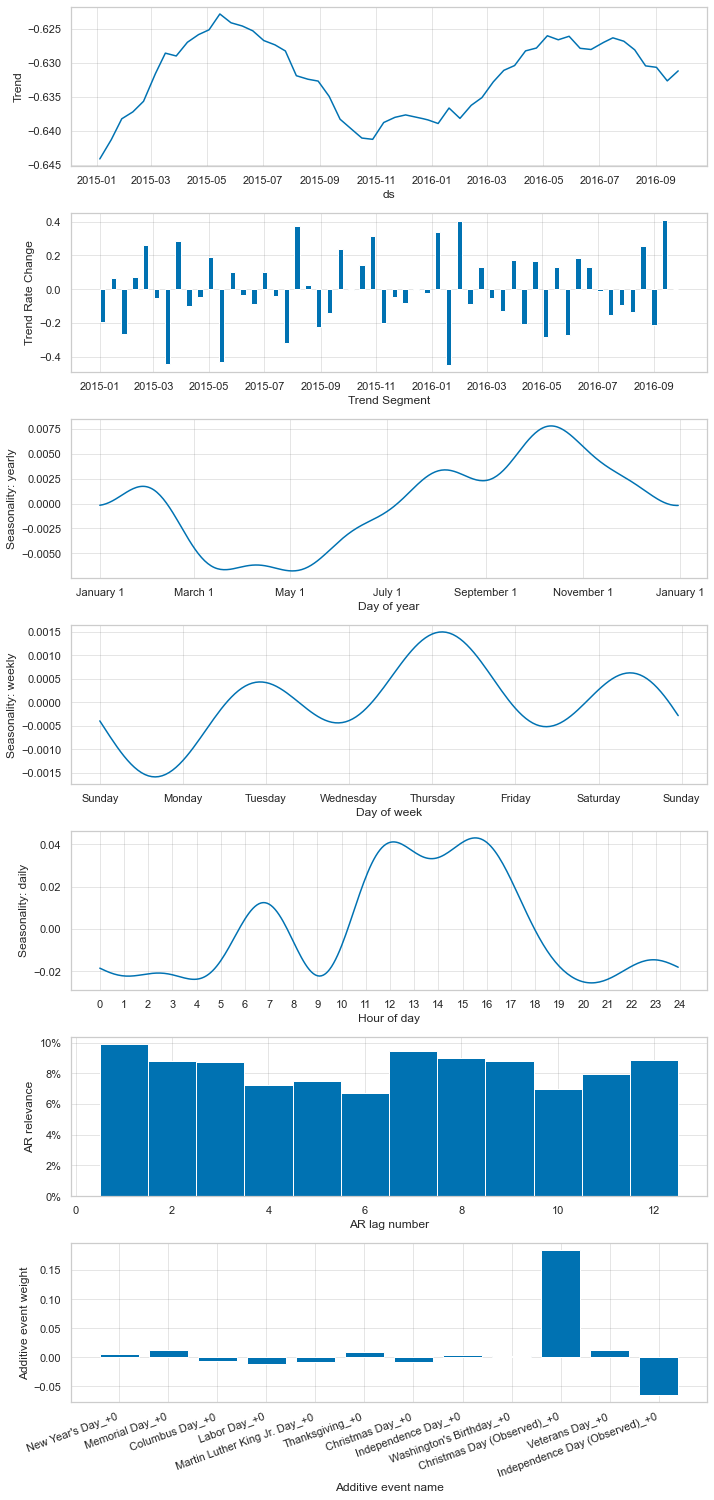

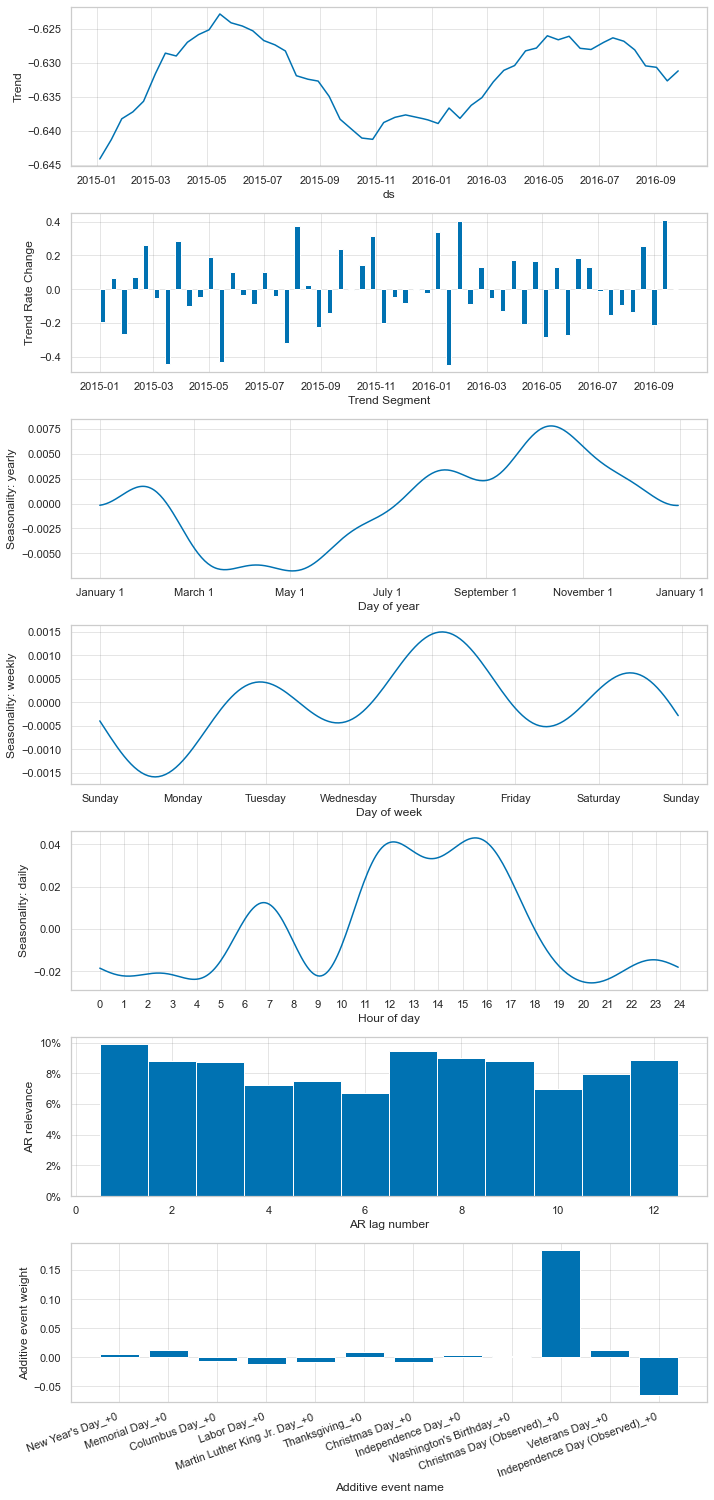

In [250]:
model3.plot_parameters()

### Section 3.3.4 - Predictions Plot

Below are the Neural Prophet Predictions of `Bike Share Count`

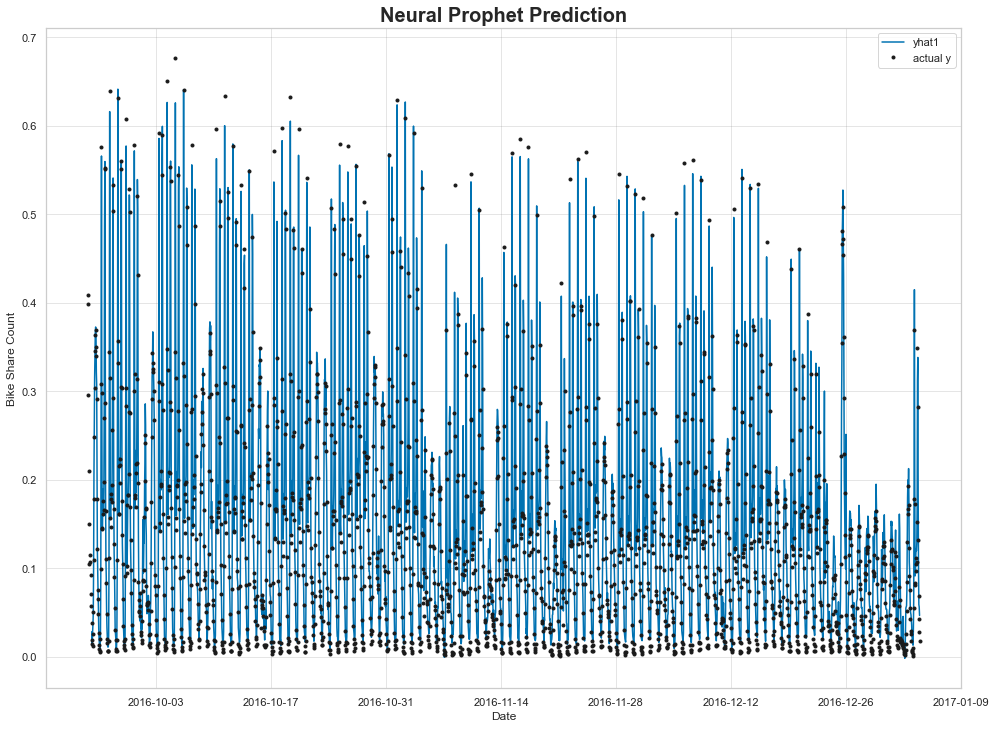

In [247]:
plot_forecast(model3, test, xlabel='Date', ylabel='Bike Share Count', title='Neural Prophet Prediction')

### Section 3.3.5 - Validation Metrics

Below are the final validation metrics for `model3`. 

Using the `RMSE` we are comparing, we see that validation loss is very close to training loss

However, it must be noted that this may be due to the short extension of the `test` set, and in longer timeframes, will not be as accurate

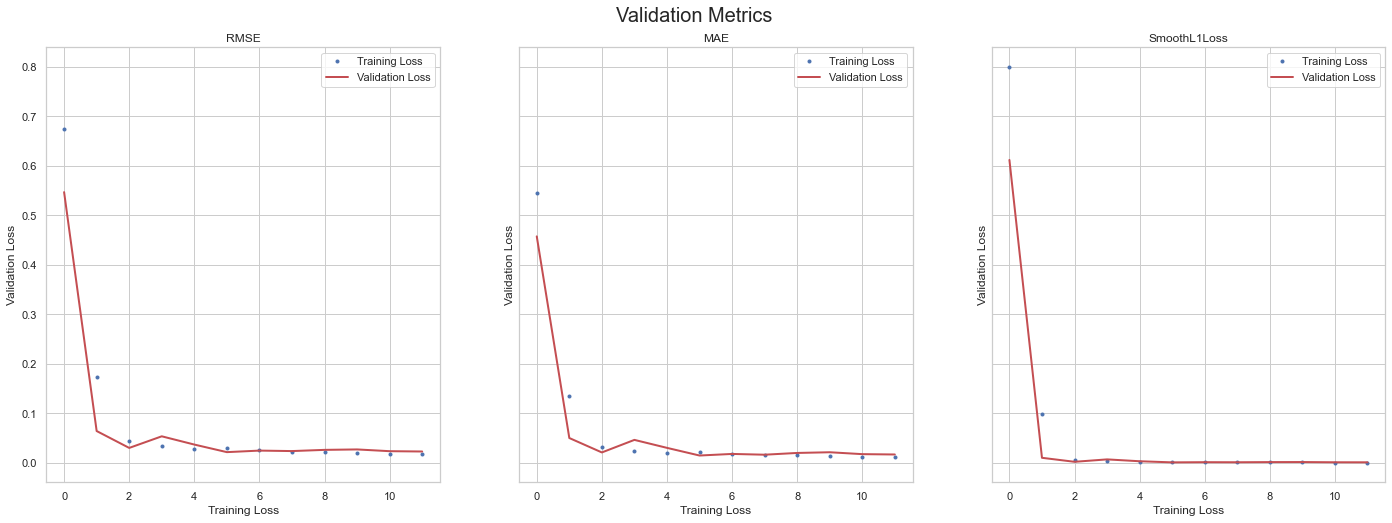

In [285]:
plot_validation(metrics3, metrics=['RMSE', 'MAE', 'SmoothL1Loss'])

### Section 3.3.6 - Metrics DataFrame

Below we show the `metrics` dataframe for `model3`. We see that the `RMSE_val` is 0.023179, meaning for good performance

In [249]:
metrics3

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.799561,0.545592,0.675149,0.0,0.612152,0.457773,0.547135
1,0.099916,0.135345,0.173295,0.0,0.010451,0.050406,0.064531
2,0.005049,0.032009,0.043938,0.0,0.002370,0.021284,0.030417
3,0.003018,0.025184,0.033936,0.0,0.007243,0.046642,0.053868
4,0.002146,0.021062,0.028773,0.0,0.003490,0.030534,0.037202
5,0.002348,0.021979,0.029629,0.0,0.001225,0.015055,0.021897
6,0.001696,0.018274,0.025568,0.0,0.001600,0.018260,0.024999
7,0.001341,0.015822,0.022702,0.0,0.001452,0.016707,0.024045
8,0.001292,0.015396,0.022265,0.0,0.001770,0.020258,0.026472
9,0.001124,0.013972,0.020753,0.0,0.001864,0.021668,0.027358


## Section 4.0 - Conclusion, Discussion, and Business Insights

From the obtained `RMSE=0.023179` for our final model, `model3`, we see that it is the best performing model of the ones we had run. This may indicate that:
- Bike Share data is highly seasonal, and (for the ratio of time period between training/testing) is effective for predicting the *testing* period of time from the *training* period of time but may caused a lagged performace in longer periods
- Our model is overfitting (as time-series/neural-network based models tend to do) and may require further validation (different distributions of the trin/test split or even a larger dataset)
- Other, machine learning based methods are not apt at predicting time-series based datasets such as this (due to factors involving autocorrelation/heteroskedastity that many traditional models cannot incorporate)

Furthermore, we can see from the `model_parameters` of `model3` in Section 3.3.3 interesting predictive results of trends:
- Usage is predicted to reach a local peak in February, a counterintutive result that could mean for more analysis for differentiated marketing tactics
- Usage is predicted to peak on Thursdays of the week, likely due to commute schedules
    - May also be due to the psychological profile of commuters
- Usage daily tends to peak betwen 11 AM and 5 PM, reasonable given the daily commute schedules
    - However, there is also a local peak centered around 7 AM, counterintuitive and perhaps necessitating further analysis
    - This may provide for unique consumer targeting
- Unintuitively, Bike Share usage peaks around Christmas (observed, meaning for the duration of the holiday)
    - Again may provide reason for further analysis for unique consumer targeting

Moving forward, we can more intimately hyperparameter tune the model (number and width of hidden layers), as well as incorporate a model with both a `NeuralProphet` component as well as other predictors available in the dataset (but making sure to remove predictors such as `isholiday`/`isweekend` that would confer multicollinearity within the model).

## Section 5.0 - Unused/Extraneous Code

Below is code and others not used in this Analysis (or to be included in the final Write-Up)

In [270]:
pickle.dump(model3, open('model3.pkl','wb'))

In [271]:
model3 = pickle.load(open('model3.pkl','rb'))

WARNING - (py.warnings._showwarnmsg) - c:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - c:\Users\sunny\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



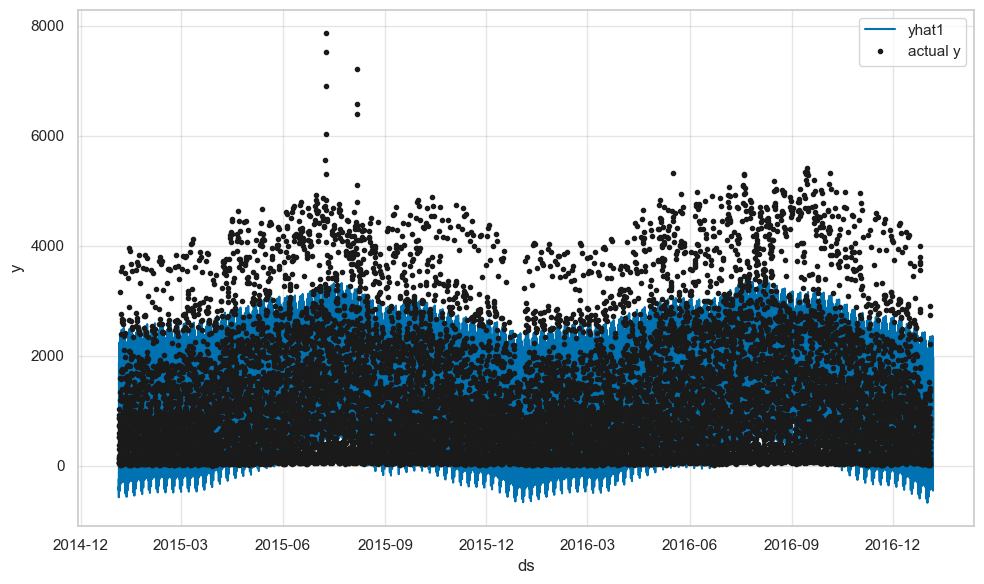

In [ ]:
plot_forecast(model, df_test, periods=60)

In [ ]:
preds = list(df)[1:]

In [ ]:
def get_global_df(data, preds):
    df_global = pd.DataFrame()
    for pred in preds:
        aux = df[['ds', pred]].copy(deep = True) #select column associated with region
        df.reset_index(drop=True, inplace=True)
        # aux = aux.iloc[:26301, :].copy(deep = True) #selects data up to 26301 row (2004 to 2007 time stamps)
        aux = aux.rename(columns = {pred: 'y'}) #rename column of data to 'y' which is compatible with Neural Prophet
        aux['ID'] = pred
        df_global = pd.concat((df_global, aux))
    
    return df_global

In [ ]:
df_test = df.rename(columns={'timestamp': 'ds', 'cnt': 'y'})[['ds', 'y']]

In [ ]:
future = model.make_future_dataframe(df_test, n_historic_predictions = True)
forecast = model.predict(future)
fig = model.plot(forecast[forecast['ID'] ==  'NORTH'])

In [ ]:
def plot_forecast(model, data, pred_names, historic_pred=True):
    
    future = model.make_future_dataframe(data, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    def plot_subplots(model, forecast, pred_names):

        pred_len = len(pred_names)
        num_cols = int(np.sqrt(pred_len))
        num_rows = int(pred_len / num_cols)

        fig, axs = plt.subplots(nrows = num_rows + (1 if pred_len % num_cols != 0 else 0), ncols = num_cols, figsize = (10 * num_rows, 10 * num_cols))
        fig.suptitle('Subplots for Global Model Using Local Normalization', fontsize=20, y=0.95)

        for pred, ax in zip(pred_names, axs.ravel()):
            model.plot(forecast[forecast['ID'] == pred], xlabel='Date', ylabel='Bike Share Count', ax=ax)
            ax.set_title(pred)

    plot_subplots(model, forecast, pred_names)

In [ ]:
df_train = df.loc[(df['timestamp'] >= '2015-01-04') & (df['timestamp'] <= '2016-09-30')]
df_test = df.loc[(df['timestamp'] >= '2016-10-01') & (df['timestamp'] <= '2017-01-03')]

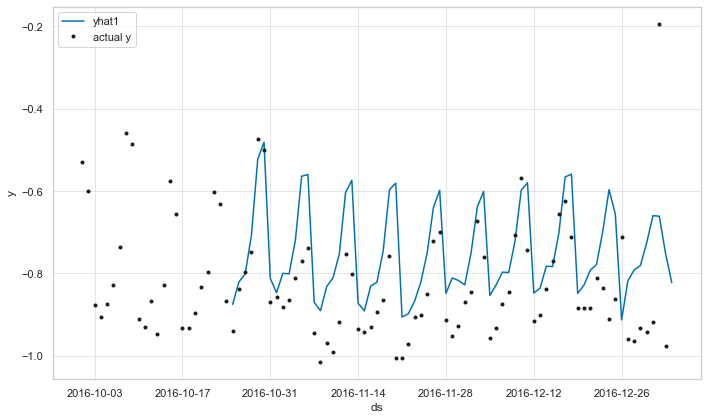

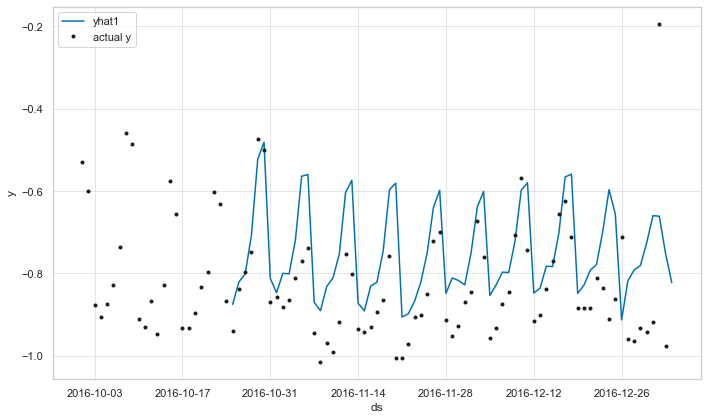

In [ ]:
future = model.make_future_dataframe(test, n_historic_predictions=True)
forecast = model.predict(future)
model.plot(forecast, df_name='cnt')